### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
lista_alumnos = [[29,  1.66], [22, 1.83], [31, 1.80], [27, 1.75], [22,1.82], [35,1.79], [34,1.90], [26,1.78], [26, 1.64], [23, 1.74],[24,1.85], [28, 1.75], [23, 1.83],[32,1.74], [34, 1.57], [27, 1.58]]

In [3]:
edad = [e[0] for e in lista_alumnos]
altura = [e[1] for e in lista_alumnos]

In [4]:
X = np.array(edad).reshape(-1,1)
y = np.array(altura).reshape(-1,1)

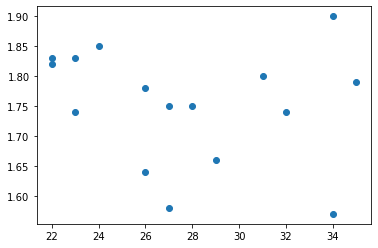

In [5]:
plt.scatter(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)
print(model.intercept_ , model.coef_)

[1.72803216] [[0.00114855]]


Text(0.5, 0, 'age')

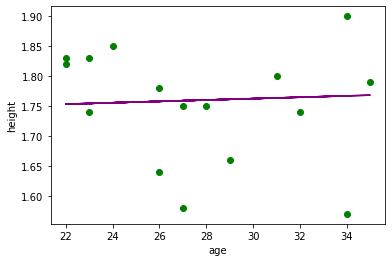

In [9]:
plt.scatter(X, y, color = "green")
plt.plot(X, model.predict(X), color="purple")
plt.ylabel("height")
plt.xlabel("age")

**¿Es una buena técnica para este tipo de problemas? ¿Por qué?**

No porque como se puede observar en el gráfico, los datos no se distribuyen de forma linear y por tanto el modelo linear no se ajusta a los datos.

**¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?**

In [10]:
dict_edad_altura = {"edad": edad , "altura": altura, "prediction":[e for lista in model.predict(X).tolist() for e in lista]}
df_edad_altura = pd.DataFrame(dict_edad_altura)
df_edad_altura["error"] = df_edad_altura["altura"] - df_edad_altura["prediction"]

In [11]:
df_edad_altura

,edad,altura,prediction,error
0,29,1.66,1.761340,-0.101340
1,22,1.83,1.753300,0.076700
2,31,1.80,1.763637,0.036363
3,27,1.75,1.759043,-0.009043
4,22,1.82,1.753300,0.066700
5,35,1.79,1.768231,0.021769
6,34,1.90,1.767083,0.132917
7,26,1.78,1.757894,0.022106
8,26,1.64,1.757894,-0.117894
9,23,1.74,1.754449,-0.014449


In [12]:
print(f'MSE --> {mean_squared_error(y_test, model.predict(X_test))}\
    \nRMSE --> {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')


MSE --> 0.012016524803650935    
RMSE --> 0.10961991061687167


**Representa la matriz de correlación, ¿los datos están correlacionados?**

In [13]:
corr_matrix = df_edad_altura[["edad", "altura"]].corr()
corr_matrix

,edad,altura
edad,1.00000,-0.18789
altura,-0.18789,1.00000


<AxesSubplot:>

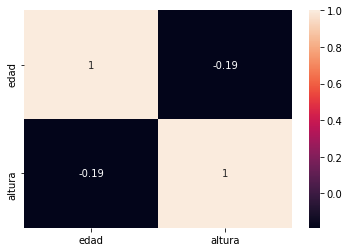

In [14]:
sns.heatmap(corr_matrix, annot = True)

**¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?**

In [15]:
X_2 = X*2
y_2 = y*2

In [16]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2)

In [17]:
model_2 = LinearRegression()
model_2.fit(X_2_train, y_2_train)

LinearRegression()

In [18]:
print(model_2.intercept_ , model_2.coef_)

[3.30214405] [[0.00371859]]


In [19]:
model_3 = LinearRegression()
model_3.fit(X_2_train, y_train)

LinearRegression()

In [20]:
print(model_3.intercept_ , model_3.coef_)

[1.85535176] [[-0.00173367]]


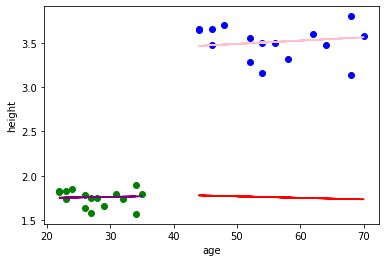

In [21]:
plt.scatter(X, y, color = "green")
plt.scatter(X_2, y_2, color = "blue")
plt.plot(X, model.predict(X), color="purple")
plt.plot(X_2, model_2.predict(X_2), color="pink")
plt.plot(X_2, model_3.predict(X_2), color = "red")
plt.ylabel("height")
plt.xlabel("age");